In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DF=pd.read_csv("Weather_data.csv",index_col='datetime_utc',parse_dates=True) #

In [3]:
DF.columns

Index([' _conds', ' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum',
       ' _precipm', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder',
       ' _tornado', ' _vism', ' _wdird', ' _wdire', ' _wgustm', ' _windchillm',
       ' _wspdm'],
      dtype='object')

In [4]:
DF.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
DF.shape

(98913, 19)

# Data Cleaning
### Checking for Missing Data


In [6]:
DF.isnull().sum()

 _conds            68
 _dewptm          619
 _fog               0
 _hail              0
 _heatindexm    69802
 _hum             753
 _precipm       98913
 _pressurem       231
 _rain              0
 _snow              0
 _tempm           669
 _thunder           0
 _tornado           0
 _vism           4416
 _wdird         14380
 _wdire         14380
 _wgustm        97850
 _windchillm    98340
 _wspdm          2353
dtype: int64

### Droping Columns which has many missing values

In [7]:
drop_col=[' _heatindexm',' _precipm',' _vism',' _wdird',' _wdire',' _wgustm',' _windchillm',' _wspdm']
X=DF.drop(drop_col,axis=1)
X.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0


In [8]:
X.isnull().sum()

 _conds         68
 _dewptm       619
 _fog            0
 _hail           0
 _hum          753
 _pressurem    231
 _rain           0
 _snow           0
 _tempm        669
 _thunder        0
 _tornado        0
dtype: int64

In [9]:
X.shape

(98913, 11)

### Droping rows with Missing values

In [10]:
col_names=X.columns
X.dropna(subset =col_names, inplace=True)

In [11]:
X.isnull().sum()

 _conds        0
 _dewptm       0
 _fog          0
 _hail         0
 _hum          0
 _pressurem    0
 _rain         0
 _snow         0
 _tempm        0
 _thunder      0
 _tornado      0
dtype: int64

In [12]:
X.shape

(97889, 11)

<AxesSubplot:>

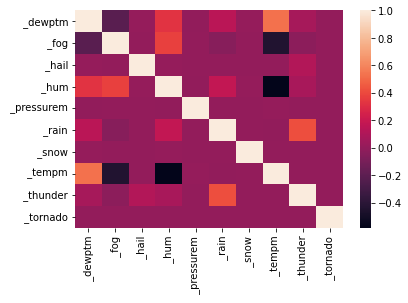

In [13]:
sns.heatmap(X.corr())

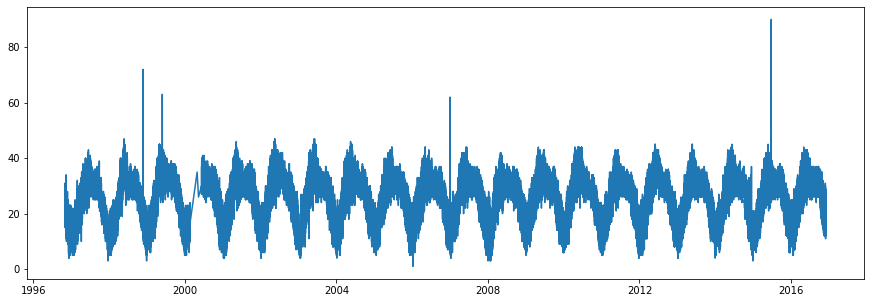

In [14]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(X[' _tempm'])
plt.show()

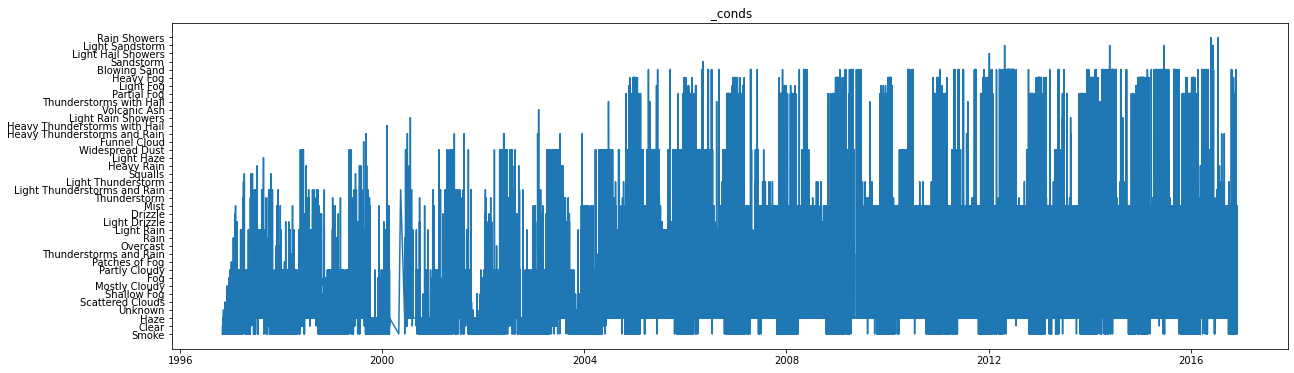

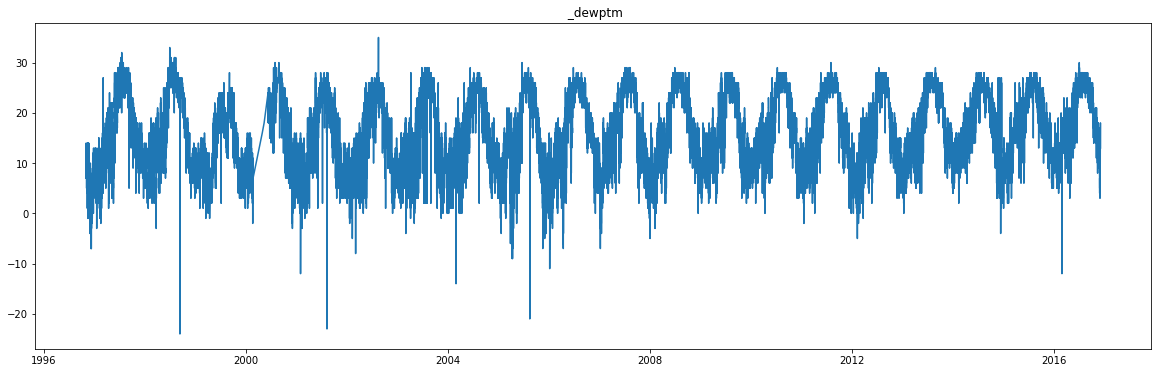

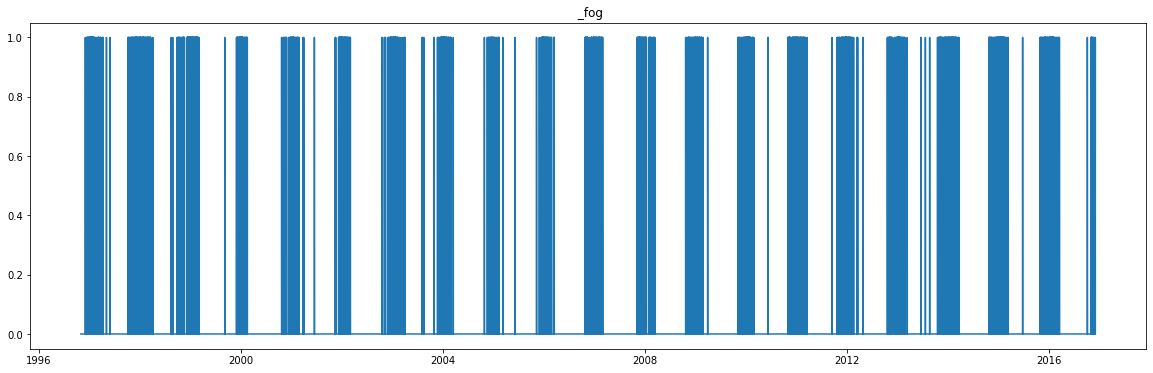

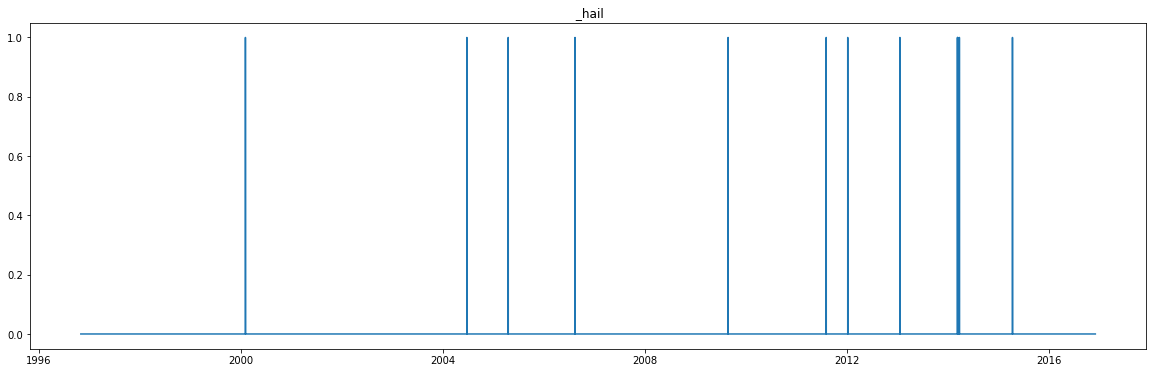

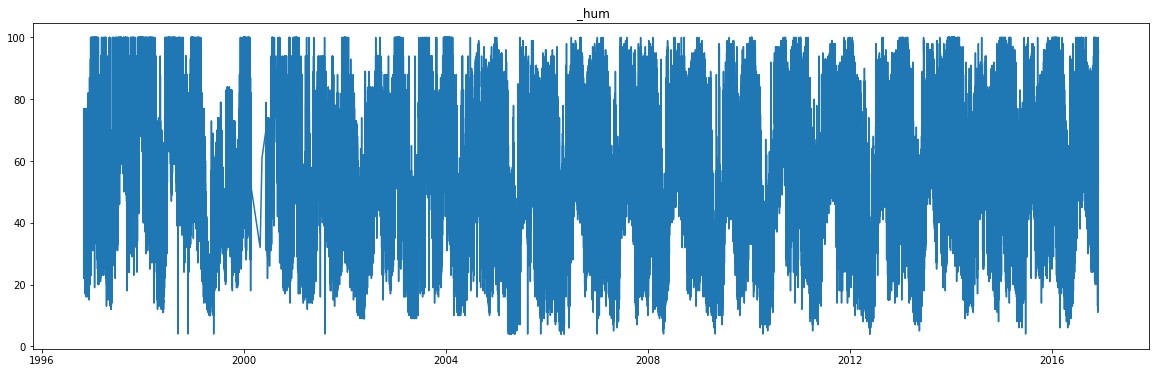

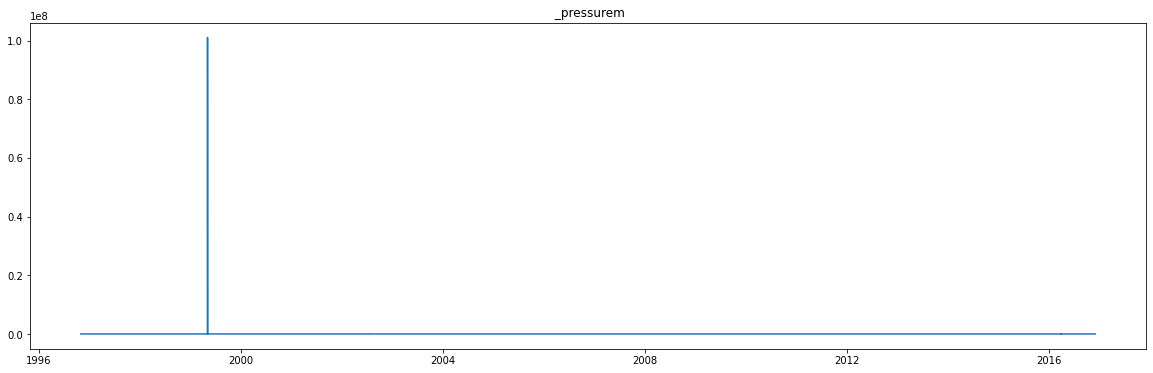

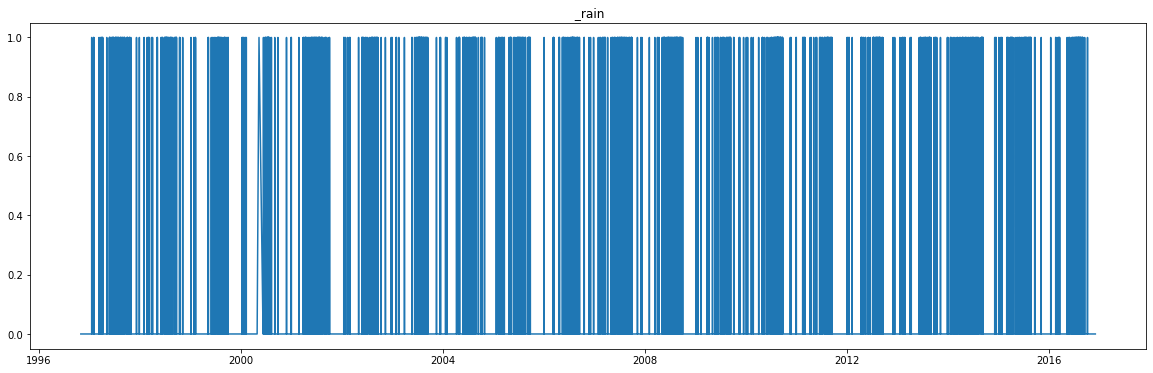

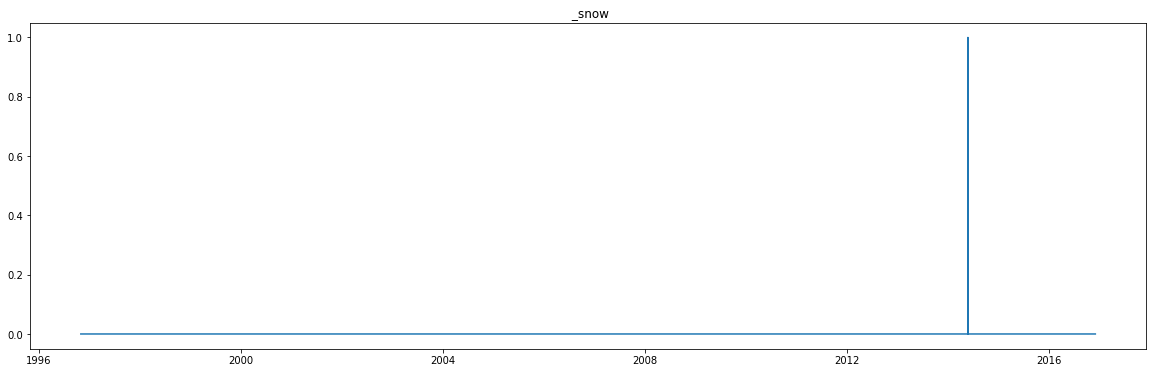

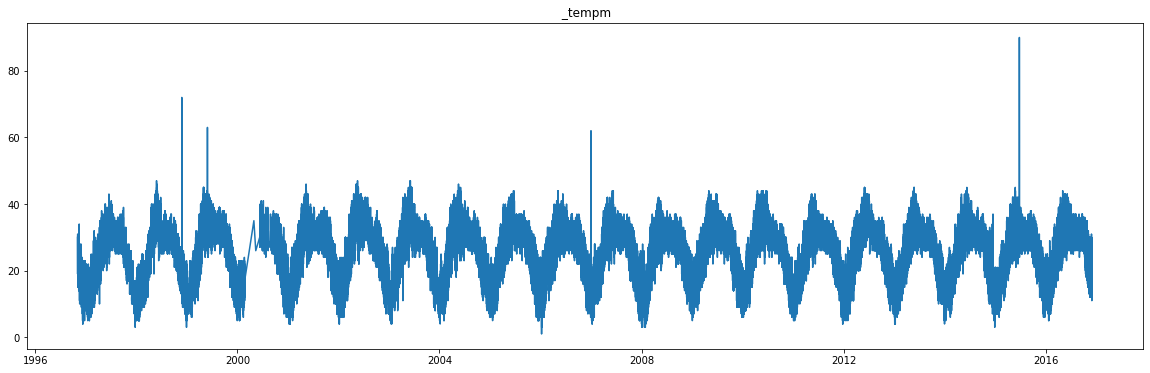

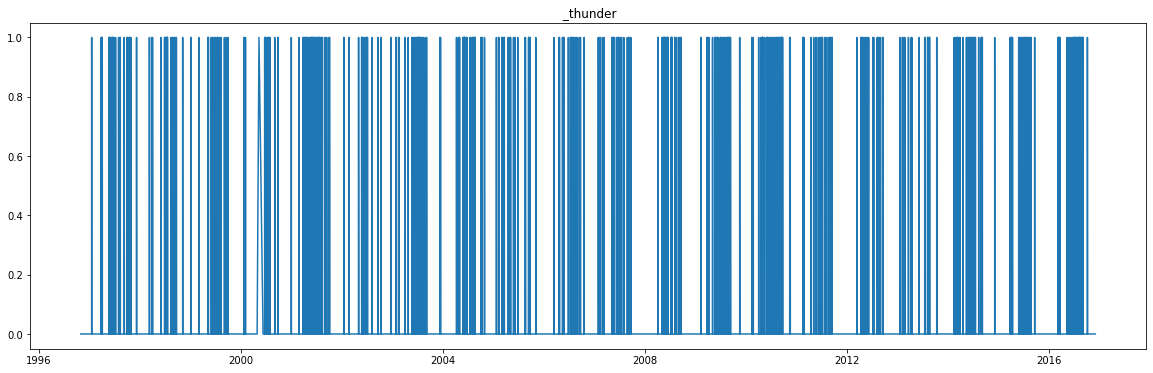

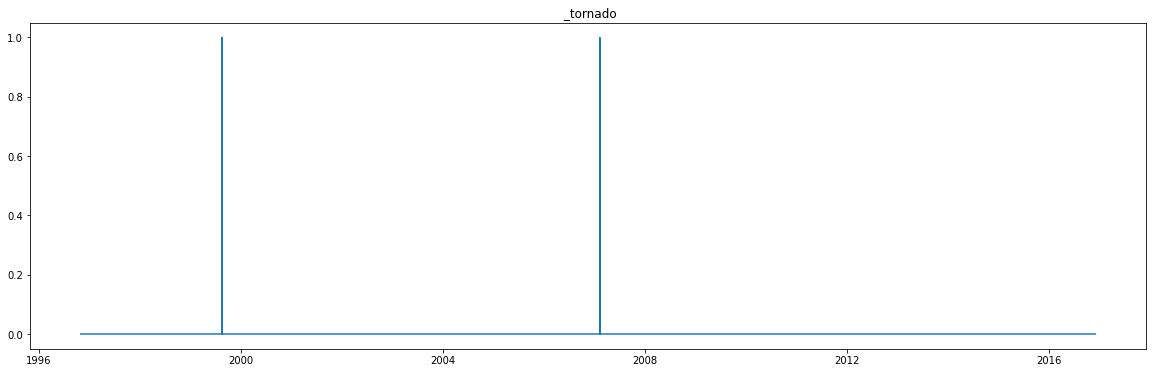

In [15]:

for i in (col_names):
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(6)
    plt.plot(X[i])
    plt.title(i)
    plt.show()


In [16]:
X.describe()

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado
count,97889.000000,97889.000000,97889.000000,97889.000000,9.788900e+04,97889.000000,97889.000000,97889.000000,97889.000000,97889.00000
mean,15.804799,0.067056,0.000133,57.771139,1.980724e+03,0.026264,0.000010,25.573190,0.009296,0.00002
std,7.092657,0.250119,0.011523,23.737779,3.230102e+05,0.159921,0.003196,8.466473,0.095968,0.00452
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000
25%,10.000000,0.000000,0.000000,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000
50%,15.000000,0.000000,0.000000,58.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000
75%,22.000000,0.000000,0.000000,77.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000
max,35.000000,1.000000,1.000000,100.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000


In [17]:
y=X[' _tempm']
X=X.drop([' _conds',' _tempm'],axis=1)

# Data Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
s_X=scaler.transform(X)

# Splitting Data into Train and Test Sets

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42) #Splitting data into train and test sets

In [20]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())# Function to calculate Root Mean Squared Error

## RandomForest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
R_reg = RandomForestRegressor(max_depth=10)
R_reg.fit(x_train,y_train)
y_pred=R_reg.predict(x_test)
print("Accuracy : ",R_reg.score(x_test,y_test)*100)
print("RMSE : ",rmse(y_pred,y_test))

Accuracy :  97.53150701829067
RMSE :  1.341152658180756
